In [ ]:
# ANAYLSIS ON SPOTIFY 2025 REPORT

In [3]:
import pandas as pd

In [11]:
# Import Excel
df = pd.read_csv("spotify_churn_dataset.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB
None


In [17]:
# Import CSV
df = pd.read_csv("spotify_churn_dataset.csv")

print(df.head(40))


    user_id  gender  age country subscription_type  listening_time  \
0         1  Female   54      CA              Free              26   
1         2   Other   33      DE            Family             141   
2         3    Male   38      AU           Premium             199   
3         4  Female   22      CA           Student              36   
4         5   Other   29      US            Family             250   
5         6  Female   17      AU              Free             219   
6         7  Female   39      UK           Premium             289   
7         8  Female   41      UK              Free             210   
8         9   Other   55      DE           Student              50   
9        10    Male   44      DE              Free             278   
10       11   Other   33      DE              Free              86   
11       12   Other   24      CA              Free             113   
12       13  Female   37      IN            Family              24   
13       14  Female 

In [19]:
# CHECK FOR NULL VALUES
df.isnull().sum()

user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [25]:
# For all object (string) columns, count empty strings

(df.select_dtypes(include="object") == "").sum()

gender               0
country              0
subscription_type    0
device_type          0
dtype: int64

In [37]:
#FINDING THE MEAN
df.mean(numeric_only=True)

user_id                  4000.500000
age                        37.662125
listening_time            154.068250
songs_played_per_day       50.127250
skip_rate                   0.300127
ads_listened_per_week       6.943875
offline_listening           0.747750
is_churned                  0.258875
dtype: float64

In [45]:
# TOTAL LISTENERS
total_listeners = df["user_id"].nunique()
print("Total listeners:", total_listeners)


Total listeners: 8000


In [47]:
# AVERAGE MEAN OF LISTENERS
listener_means = df.drop(columns=["user_id"]).mean(numeric_only=True)

print("Average statistics per listener:\n")
print(listener_means)

Average statistics per listener:

age                       37.662125
listening_time           154.068250
songs_played_per_day      50.127250
skip_rate                  0.300127
ads_listened_per_week      6.943875
offline_listening          0.747750
is_churned                 0.258875
dtype: float64


In [49]:
# TOP COUNTRY LIST
df["country"].value_counts()


country
AU    1034
US    1032
DE    1015
IN    1011
PK     999
FR     989
UK     966
CA     954
Name: count, dtype: int64

In [51]:
# HIGHEST COUNTRY
top_country = df["country"].value_counts().idxmax()
top_count = df["country"].value_counts().max()

print(f"Country with the highest listeners: {top_country} ({top_count} listeners)")

Country with the highest listeners: AU (1034 listeners)


In [61]:
# COUNTRY WITH THE MOST SUBSCRIBERS 
subscribers_by_country = (
    df[df["subscription_type"] != "Free"]  # exclude free users
    .groupby("country")["user_id"]
    .nunique()
    .sort_values(ascending=False))

top_country = subscribers_by_country.idxmax()
top_count = subscribers_by_country.max()

print(f"Country with the highest subscribers: {top_country} ({top_count} subscribers)")

Country with the highest subscribers: AU (787 subscribers)


In [63]:
# RANKING THE COUNTRIES
df.groupby("country")["user_id"].nunique().sort_values(ascending=False)


country
AU    1034
US    1032
DE    1015
IN    1011
PK     999
FR     989
UK     966
CA     954
Name: user_id, dtype: int64

In [73]:
# OFFLINE LISTENSING RANKING
offline_by_country = (
    df[df["offline_listening"] == 1]
    .groupby("country")["user_id"]
    .nunique()
    .sort_values(ascending=False)
)

top_country = offline_by_country.idxmax()
top_count = offline_by_country.max()

print(f"Country with the highest offline listening users: {top_country} ({top_count} users)")



Country with the highest offline listening users: AU (787 users)


In [83]:
offline_percentage = (
    df.groupby("country")["offline_listening"].mean().sort_values(ascending=False))
print(offline_percentage)

country
AU    0.761122
DE    0.754680
US    0.752907
IN    0.747774
FR    0.745197
UK    0.742236
CA    0.742138
PK    0.734735
Name: offline_listening, dtype: float64


In [85]:
# COUNTRY WITH THE HIGHEST TOTAL ads LISTENED 
ads_total = df.groupby("country")["ads_listened_per_week"].sum().sort_values(ascending=False)
top_country_total = ads_total.idxmax()
top_count_total = ads_total.max()

print(f"Country with the highest TOTAL ads listened: {top_country_total} ({top_count_total} ads/week)")

Country with the highest TOTAL ads listened: PK (7110 ads/week)


In [89]:
# Country with the highest average ads listened per user
ads_avg = df.groupby("country")["ads_listened_per_week"].mean().sort_values(ascending=False)
top_country_avg = ads_avg.idxmax()
top_count_avg = ads_avg.max()

print(f"Country with the highest AVERAGE ads per listener: {top_country_avg} ({top_count_avg:.2f} ads/week per user)")

Country with the highest AVERAGE ads per listener: CA (7.32 ads/week per user)


In [91]:
# Rank by total ads listened per week
ads_total = df.groupby("country")["ads_listened_per_week"].sum().sort_values(ascending=False)
print("Ranking by TOTAL ads listened per week:\n")
print(ads_total)

Ranking by TOTAL ads listened per week:

country
PK    7110
FR    6998
AU    6997
CA    6980
UK    6943
DE    6922
US    6830
IN    6771
Name: ads_listened_per_week, dtype: int64


In [113]:
# COUNTRY RANKING FOR SKIPED RATE
skip_rate_avg = df.groupby("country")["skip_rate"].mean().sort_values(ascending=False)
top_country = skip_rate_avg.idxmax()
top_rate = skip_rate_avg.max()
print("\nRanking of countries by average skip rate:\n"),(skip_rate_avg)


Ranking of countries by average skip rate:



(None,
 country
 CA    0.305409
 DE    0.305251
 FR    0.304095
 IN    0.302057
 PK    0.299910
 UK    0.297899
 AU    0.296954
 US    0.289990
 Name: skip_rate, dtype: float64)

In [117]:
# DEVICE TYPE USAGE
device_usage = df["device_type"].value_counts()
print(device_usage)

device_type
Desktop    2778
Web        2623
Mobile     2599
Name: count, dtype: int64


In [123]:
# SONG PLAYED PER DAY BY COUNTRY
songs_avg = df.groupby("country")["songs_played_per_day"].mean().sort_values(ascending=False)
top_country = songs_avg.idxmax()
top_value = songs_avg.max()

print(f"Country with the highest average songs played per day: {top_country} ({top_value:.2f} songs/day)")
print(songs_avg)

Country with the highest average songs played per day: CA (52.04 songs/day)
country
CA    52.039832
PK    51.919920
FR    50.821031
IN    49.869436
AU    49.751451
UK    49.116977
DE    48.901478
US    48.739341
Name: songs_played_per_day, dtype: float64


In [131]:
# NUMBERS OF LISTENERS BY GENDER
gender_counts = df["gender"].value_counts()

print("Number of listeners by gender:\n")
print(gender_counts)

Number of listeners by gender:

gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64


In [137]:
# SONGS PLAYED PER DAY BY GENDER
songs_by_gender = df.groupby("gender")["songs_played_per_day"].mean().sort_values()
lowest_gender = songs_by_gender.idxmin()
lowest_value = songs_by_gender.min()
print("\nAverage songs played per day by gender:\n")
print(songs_by_gender)


Average songs played per day by gender:

gender
Female    49.684092
Male      50.128577
Other     50.570566
Name: songs_played_per_day, dtype: float64


In [139]:
# Count users by age and subscription_type
subscription_by_age = df.groupby(["age", "subscription_type"])["user_id"].count().unstack().fillna(0)

print("Subscriptions by age:\n")
print(subscription_by_age)

Subscriptions by age:

subscription_type  Family  Free  Premium  Student
age                                              
16                     40    52       44       36
17                     33    47       42       55
18                     38    49       49       49
19                     39    45       58       39
20                     50    50       60       42
21                     42    49       56       52
22                     43    59       51       47
23                     41    32       50       52
24                     45    46       41       44
25                     39    53       39       37
26                     44    48       43       38
27                     32    36       40       38
28                     40    47       45       41
29                     37    39       42       33
30                     48    50       53       41
31                     36    41       52       44
32                     49    42       44       49
33                     45  

In [141]:
# Age with the highest total subscriptions (all types combined)
top_age_total = subscription_by_age.sum(axis=1).idxmax()
top_count_total = subscription_by_age.sum(axis=1).max()
print(f"\nAge with the most total subscriptions: {top_age_total} ({top_count_total} users)")


Age with the most total subscriptions: 51 (207 users)


In [143]:
# Age with the highest number of users for each subscription type

top_per_subscription = subscription_by_age.idxmax()
print("\nAge with the most users for each subscription type:\n")
print(top_per_subscription)


Age with the most users for each subscription type:

subscription_type
Family     49
Free       22
Premium    20
Student    53
dtype: int64


In [162]:
# MOST LISTENERS AND SUBSCRIBERS BY AGE BRACKECT 
top_group = subs_by_age_group.idxmax()
top_count = subs_by_age_group.max()
print(f"Age group with the most listeners (including Free): {top_group} ({top_count} users)\n")
print("Ranking of age groups by total listeners:\n")
print(subs_by_age_group)

Age group with the most listeners (including Free): 45-54 (1877 users)

Ranking of age groups by total listeners:

age_group
45-54    1877
35-44    1815
25-34    1728
18-24    1318
55-64     913
<18       349
65+         0
Name: user_id, dtype: int64


In [164]:
# MOST LISTENERS AND SUBSCRIBERS BY AGE BRACKECT 
subscribers = df[df["subscription_type"] != "Free"]
subs_by_age_group = subscribers.groupby("age_group")["user_id"].count().sort_values(ascending=False)
top_group = subs_by_age_group.idxmax()
top_count = subs_by_age_group.max()

print(f"Age group with the most subscribers: {top_group} ({top_count} users)\n")
print("Ranking of age groups by subscribers:\n")
print(subs_by_age_group)

Age group with the most subscribers: 45-54 (1404 users)

Ranking of age groups by subscribers:

age_group
45-54    1404
35-44    1352
25-34    1287
18-24     988
55-64     701
<18       250
65+         0
Name: user_id, dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_23364\1763250467.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subs_by_age_group = subscribers.groupby("age_group")["user_id"].count().sort_values(ascending=False)


In [172]:
# HIGHEST SKIPED RATE BY AGE
skip_rate_by_age = df.groupby("age")["skip_rate"].mean().sort_values(ascending=False)
top_age = skip_rate_by_age.idxmax()
top_rate = skip_rate_by_age.max()
print(f"Age with the highest average skip rate: {top_age} ({top_rate:.2f})\n")
print("Average skip rate by age:\n")
print(skip_rate_by_age)


Age with the highest average skip rate: 29 (0.32)

Average skip rate by age:

age
29    0.316490
18    0.315676
36    0.314576
16    0.312965
56    0.312882
46    0.310990
32    0.310489
44    0.309148
24    0.307330
17    0.307006
21    0.305930
49    0.305650
48    0.305638
19    0.305304
20    0.305099
54    0.304971
22    0.304850
53    0.304757
28    0.304451
35    0.303911
33    0.301452
39    0.301272
41    0.300255
27    0.299863
30    0.299844
52    0.299316
26    0.297977
45    0.297976
25    0.296786
43    0.296416
51    0.296280
57    0.295446
50    0.294457
40    0.294000
47    0.292474
38    0.291941
37    0.291386
42    0.290905
34    0.289560
23    0.287486
59    0.287174
55    0.285057
31    0.280809
58    0.271858
Name: skip_rate, dtype: float64


In [174]:
# Total ads listened per week by age
ads_total_by_age = df.groupby("age")["ads_listened_per_week"].sum().sort_values(ascending=False)

top_age_total = ads_total_by_age.idxmax()
top_count_total = ads_total_by_age.max()

print(f"Age with the highest TOTAL ads listened per week: {top_age_total} ({top_count_total} ads)\n")

Age with the highest TOTAL ads listened per week: 37 (1712 ads)



In [176]:
# Ranking and Average ads listened per user by age
ads_avg_by_age = df.groupby("age")["ads_listened_per_week"].mean().sort_values(ascending=False)

top_age_avg = ads_avg_by_age.idxmax()
top_count_avg = ads_avg_by_age.max()

print(f"Age with the highest AVERAGE ads per user per week: {top_age_avg} ({top_count_avg:.2f} ads)\n")

print("Ranking of ages by TOTAL ads listened:\n")
print(ads_total_by_age)

print("\nRanking of ages by AVERAGE ads listened per user:\n")
print(ads_avg_by_age)

Age with the highest AVERAGE ads per user per week: 37 (8.48 ads)

Ranking of ages by TOTAL ads listened:

age
37    1712
22    1531
47    1510
50    1463
36    1444
53    1429
20    1404
19    1388
25    1386
26    1385
54    1384
30    1381
38    1379
18    1362
48    1359
16    1354
42    1335
51    1323
28    1314
21    1306
34    1300
44    1292
24    1283
57    1265
46    1264
45    1218
49    1216
17    1194
33    1191
52    1185
56    1180
40    1163
43    1150
31    1149
35    1136
55    1114
59    1105
39    1089
32    1087
41    1066
27    1021
58    1010
29     915
23     809
Name: ads_listened_per_week, dtype: int64

Ranking of ages by AVERAGE ads listened per user:

age
37    8.475248
25    8.250000
36    8.158192
38    8.111765
26    8.005780
54    8.000000
50    7.951087
47    7.947368
16    7.872093
53    7.724324
19    7.668508
22    7.655000
28    7.595376
18    7.362162
44    7.340909
24    7.289773
45    7.250000
48    7.228723
30    7.192708
34    7.142857
27    6

In [180]:
# Count subscribers by subscription type
subscription_counts = df["subscription_type"].value_counts()
print(subscription_counts)

subscription_type
Premium    2115
Free       2018
Student    1959
Family     1908
Name: count, dtype: int64


In [194]:
# Average songs played per day by subscription type
songs_by_sub_type = (
    
df.groupby("subscription_type")["songs_played_per_day"]
    .mean()
    .loc[["Premium", "Student", "Family", "Free"]]  # focus on these 4
    .sort_values(ascending=False))
print(songs_by_sub_type)


subscription_type
Student    51.241960
Family     50.383124
Premium    49.744681
Free       49.204163
Name: songs_played_per_day, dtype: float64


In [196]:
# Churn counts by subscription type

churn_counts = (
    df.groupby("subscription_type")["is_churned"]
    .sum()
    .loc[["Family", "Free", "Student", "Premium"]]  # focus on these 4
    .sort_values(ascending=False)
)
print(churn_counts)

subscription_type
Premium    530
Family     525
Student    513
Free       503
Name: is_churned, dtype: int64


In [214]:
# Top 10 listeners in each country by songs_played_per_day
top_listeners_per_country = (
    df.sort_values(["country", "songs_played_per_day"], ascending=[True, False])
    .groupby("country")
    .head(10))
print(top_listeners_per_country)


      user_id  gender  age country subscription_type  listening_time  \
885       886    Male   59      AU              Free              51   
1371     1372    Male   49      AU              Free             121   
2978     2979  Female   26      AU            Family              19   
3500     3501    Male   19      AU           Student             154   
3697     3698  Female   58      AU           Student              26   
...       ...     ...  ...     ...               ...             ...   
37         38  Female   50      US            Family             117   
937       938   Other   25      US            Family             155   
1330     1331    Male   40      US            Family             268   
1596     1597  Female   55      US           Premium             147   
1853     1854    Male   17      US            Family             136   

      songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
885                     99       0.55         Web          

In [220]:
# Top 10 youngest listeners with their device type
top_10_youngest = (
    df.sort_values("age", ascending=True)
    .head(10)[["user_id", "age", "device_type"]]
)

print("Top 10 youngest listeners by device_type:\n")
print(top_10_youngest)

Top 10 youngest listeners by device_type:

      user_id  age device_type
3167     3168   16      Mobile
5589     5590   16     Desktop
6778     6779   16         Web
7325     7326   16         Web
1792     1793   16         Web
486       487   16      Mobile
3124     3125   16         Web
2760     2761   16      Mobile
4197     4198   16         Web
7864     7865   16      Mobile


In [224]:
# Top 10 youngest listeners per device type
top_10_youngest_per_device = (
    df.sort_values(["device_type", "age"], ascending=[True, True])
    .groupby("device_type")
    .head(10)
)
print(top_10_youngest_per_device)

      user_id  gender  age country subscription_type  listening_time  \
111       112    Male   16      CA            Family              17   
176       177   Other   16      AU              Free             184   
188       189   Other   16      US           Student             179   
367       368   Other   16      IN              Free             269   
415       416   Other   16      UK              Free              97   
637       638   Other   16      IN           Student             177   
787       788  Female   16      CA           Premium             150   
910       911   Other   16      PK           Premium             114   
1269     1270   Other   16      PK              Free              48   
1437     1438    Male   16      UK           Premium             160   
178       179    Male   16      DE              Free             184   
211       212  Female   16      DE              Free              74   
486       487    Male   16      DE           Student            

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

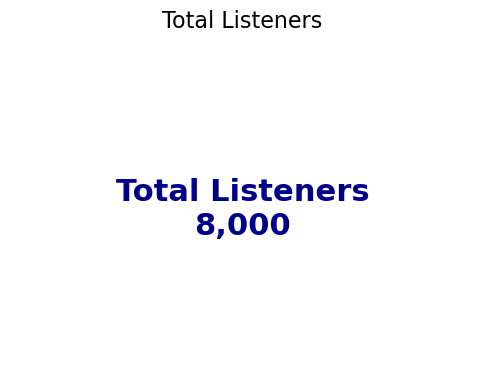

In [234]:
# Total number of listeners

total_listeners = df["user_id"].nunique()
plt.figure(figsize=(6,4))
plt.text(0.5, 0.5, f"Total Listeners\n{total_listeners:,}", 
         fontsize=22, ha='center', va='center', color="darkblue", weight="bold")
plt.axis("off")
plt.title("Total Listeners", fontsize=16, pad=20)
plt.show()

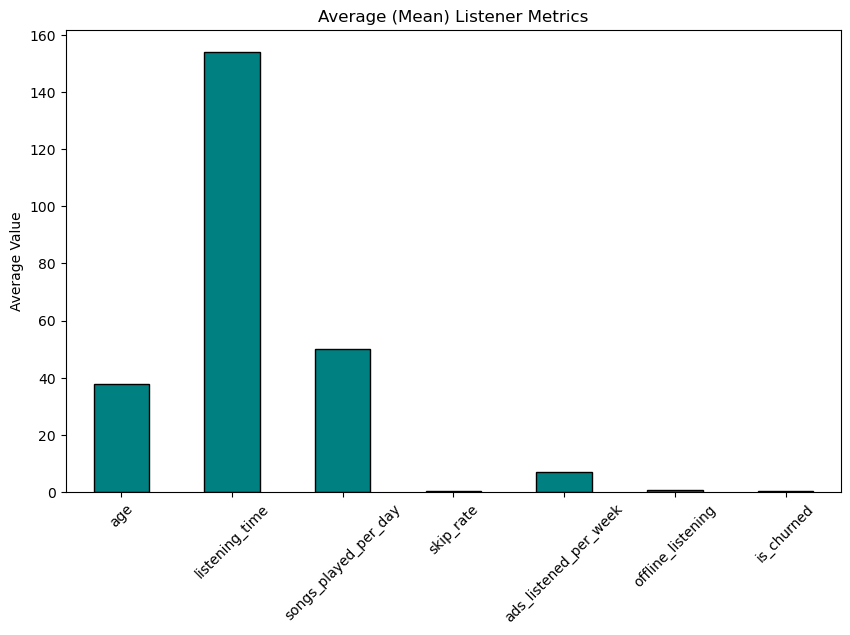

In [250]:

# Visualization - bar chart of averages
plt.figure(figsize=(10,6))
mean_values.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Average (Mean) Listener Metrics")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.show()


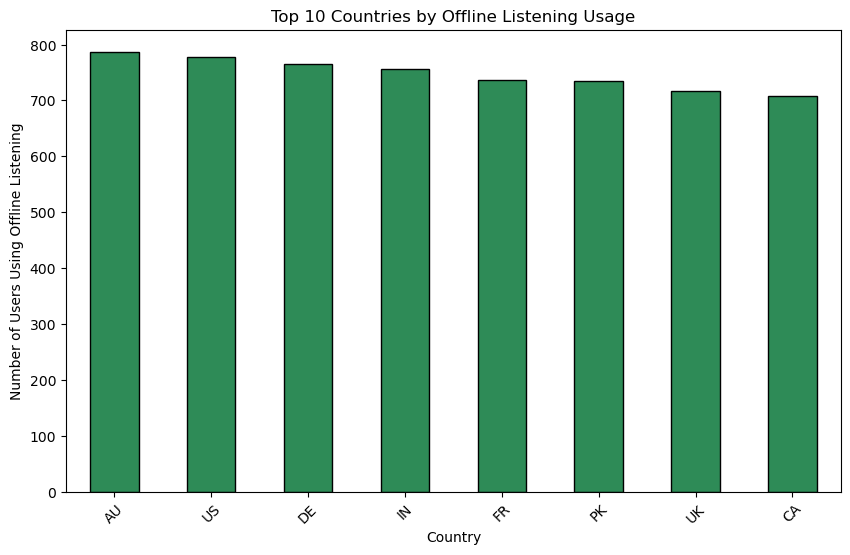

In [258]:
# TOP 10 OFFLINE LISTENING COUNT PER COUNTRY 
plt.figure(figsize=(10,6))
offline_by_country.head(10).plot(kind="bar", color="seagreen", edgecolor="black")
plt.title("Top 10 Countries by Offline Listening Usage")
plt.ylabel("Number of Users Using Offline Listening")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

Country with the lowest ads listened per week: US (6.62 ads on average)


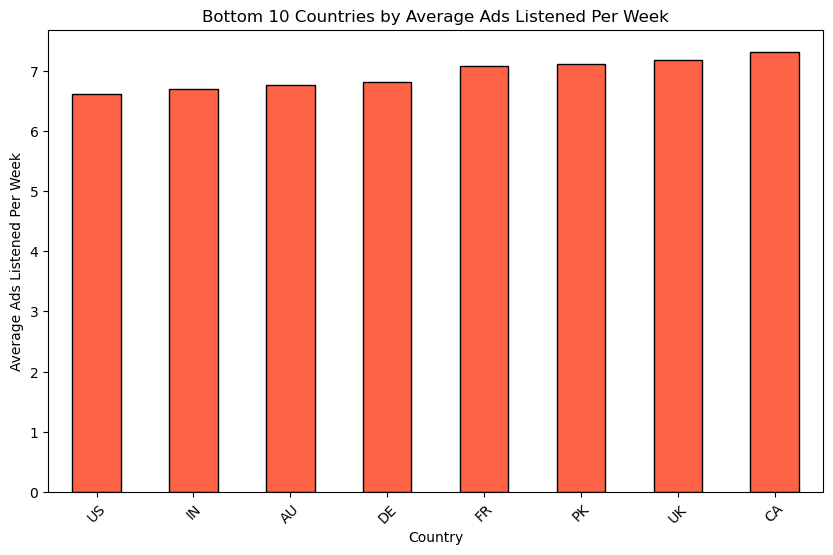

In [280]:
# COUNTRY WITH THE LOWEST AD LISTENERS PER WEEK
ads_by_country = df.groupby("country")["ads_listened_per_week"].mean().sort_values(ascending=True)
lowest_country = ads_by_country.idxmin()
lowest_value = ads_by_country.min()
print(f"Country with the lowest ads listened per week: {lowest_country} ({lowest_value:.2f} ads on average)")
plt.figure(figsize=(10,6))
ads_by_country.head(10).plot(kind="bar", color="tomato", edgecolor="black")
plt.title("Bottom 10 Countries by Average Ads Listened Per Week")
plt.ylabel("Average Ads Listened Per Week")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23364\2808963177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skip_rate_by_country.head(10).index,


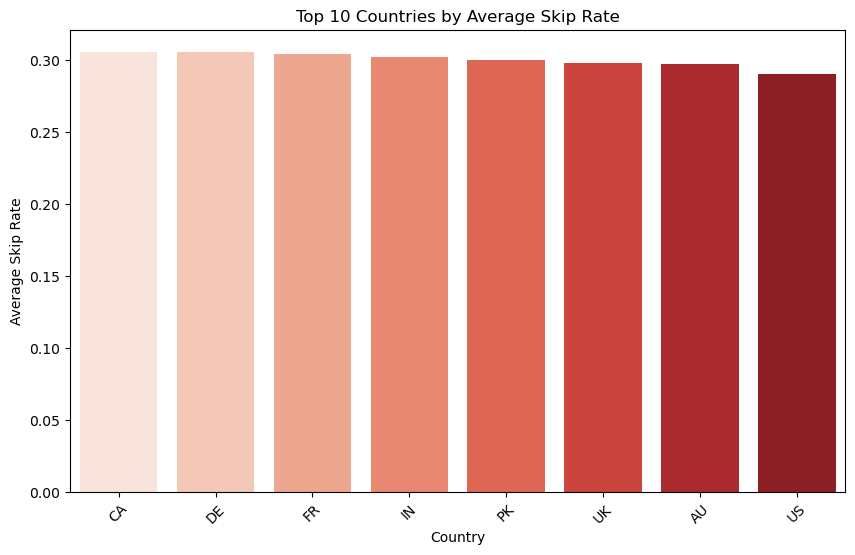

In [289]:
# Top country by skip rate
top_country = skip_rate_by_country.idxmax()
top_rate = skip_rate_by_country.max()
plt.figure(figsize=(10,6))
sns.barplot(x=skip_rate_by_country.head(10).index, 
            y=skip_rate_by_country.head(10).values, 
            palette="Reds")
plt.title("Top 10 Countries by Average Skip Rate")
plt.ylabel("Average Skip Rate")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23364\394145331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_counts.index, y=device_counts.values, palette="Blues_d")


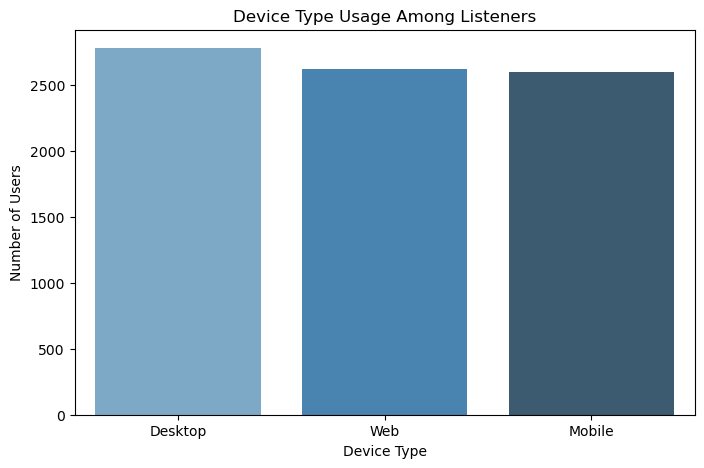

In [297]:
# MOST USED DEVICE
device_counts = df["device_type"].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=device_counts.index, y=device_counts.values, palette="Blues_d")
plt.title("Device Type Usage Among Listeners")
plt.ylabel("Number of Users")
plt.xlabel("Device Type")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23364\1350850835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=songs_avg_by_country.head(10).index,


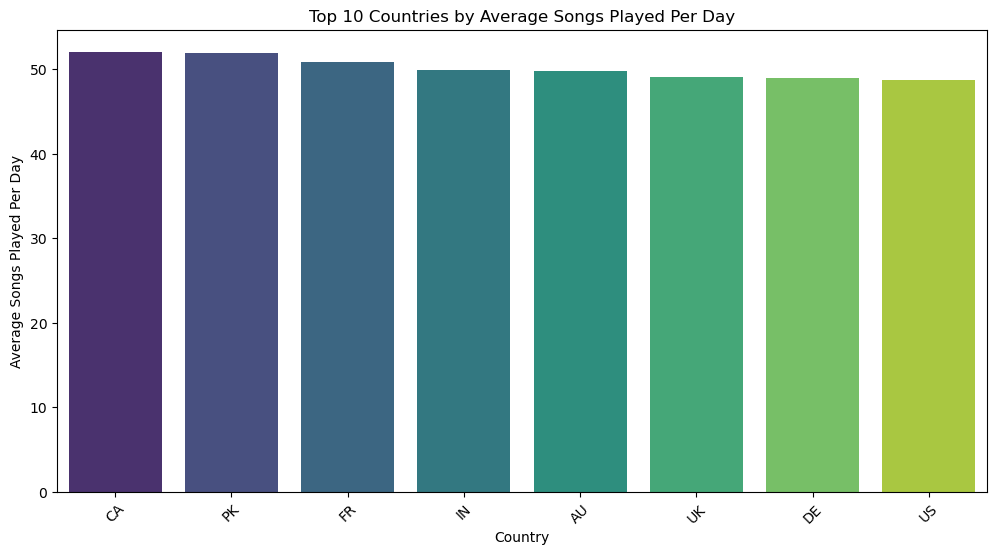

In [317]:
# COUNTRY WITH MOST SONGS PLAYED PER DAY
plt.figure(figsize=(12,6))
sns.barplot(x=songs_avg_by_country.head(10).index, 
            y=songs_avg_by_country.head(10).values, 
            palette="viridis")
plt.title("Top 10 Countries by Average Songs Played Per Day")
plt.ylabel("Average Songs Played Per Day")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_23364\2674908876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")


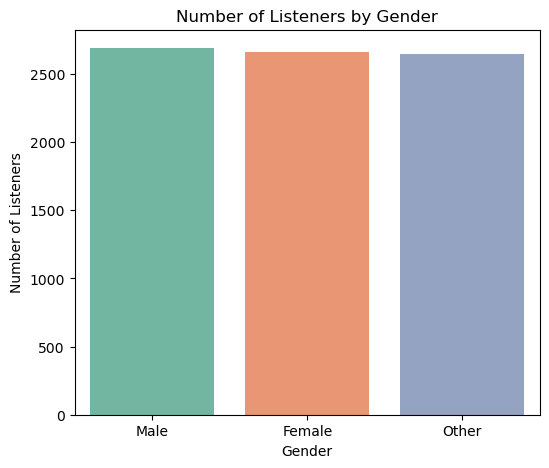

In [319]:
# GENDER TYPE

plt.figure(figsize=(6,5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.title("Number of Listeners by Gender")
plt.ylabel("Number of Listeners")
plt.xlabel("Gender")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23364\975090046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=songs_by_gender.index, y=songs_by_gender.values, palette="coolwarm")


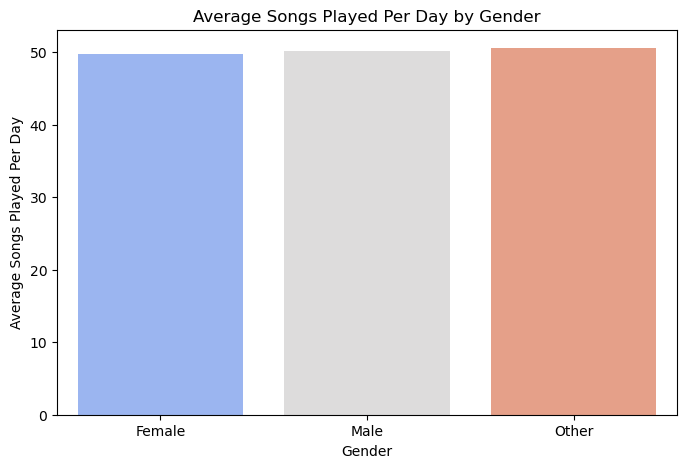

In [333]:
#GENDER WITH LOWEST SONG PLAYED PER DAY
plt.figure(figsize=(8,5))
sns.barplot(x=songs_by_gender.index, y=songs_by_gender.values, palette="coolwarm")
plt.title("Average Songs Played Per Day by Gender")
plt.ylabel("Average Songs Played Per Day")
plt.xlabel("Gender")
plt.show()

Device Type usage by Subscription Type:

subscription_type  Family  Free  Premium  Student
device_type                                      
Desktop               665   663      745      705
Mobile                626   670      678      625
Web                   617   685      692      629


<Figure size 1000x600 with 0 Axes>

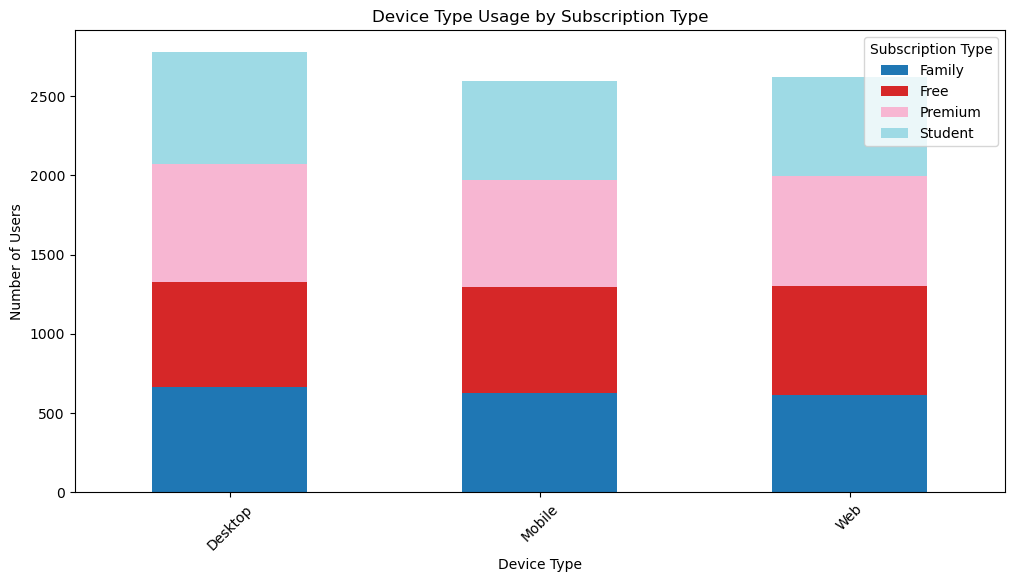

In [337]:
# DEVICE TYPE VS SUBSCRPTION TYPE
device_sub_counts = df.groupby(["device_type", "subscription_type"])["user_id"].count().unstack().fillna(0)

print("Device Type usage by Subscription Type:\n")
print(device_sub_counts)
plt.figure(figsize=(10,6))
device_sub_counts.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Device Type Usage by Subscription Type")
plt.ylabel("Number of Users")
plt.xlabel("Device Type")
plt.xticks(rotation=45)
plt.legend(title="Subscription Type")
plt.show()

Subscription type distribution by gender:

subscription_type  Family  Free  Premium  Student
gender                                           
Female                604   687      701      667
Male                  657   659      725      650
Other                 647   672      689      642

Most common subscription type per gender:

gender
Female    Premium
Male      Premium
Other     Premium
dtype: object


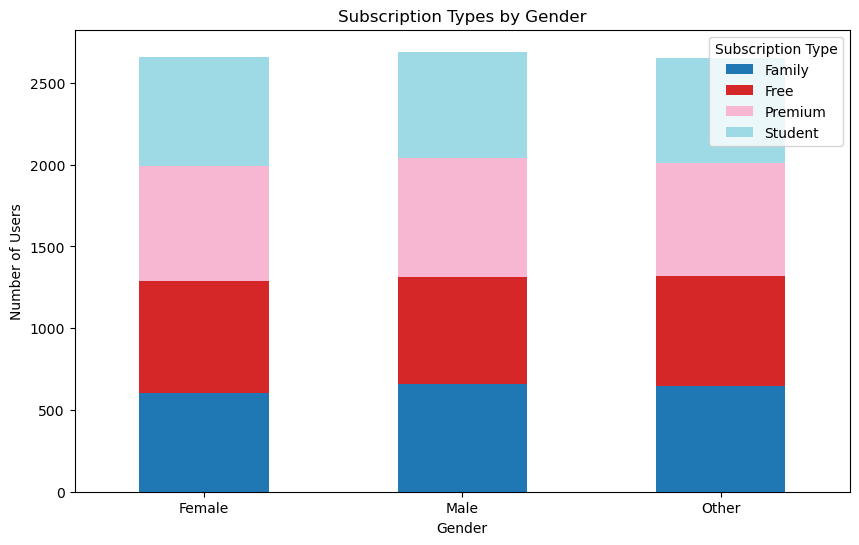

In [343]:
# SUBSCRIPTION TYPE BY GENDR
gender_sub_counts = df.groupby(["gender", "subscription_type"])["user_id"].count().unstack().fillna(0)

print("Subscription type distribution by gender:\n")
print(gender_sub_counts)
max_sub_per_gender = gender_sub_counts.idxmax(axis=1)
print("\nMost common subscription type per gender:\n")
print(max_sub_per_gender)
gender_sub_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Subscription Types by Gender")
plt.ylabel("Number of Users")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Subscription Type")
plt.show()

Percentage distribution of subscription types by gender:

subscription_type  Family   Free  Premium  Student
gender                                            
Female              22.72  25.84    26.36    25.08
Male                24.41  24.49    26.94    24.15
Other               24.42  25.36    26.00    24.23


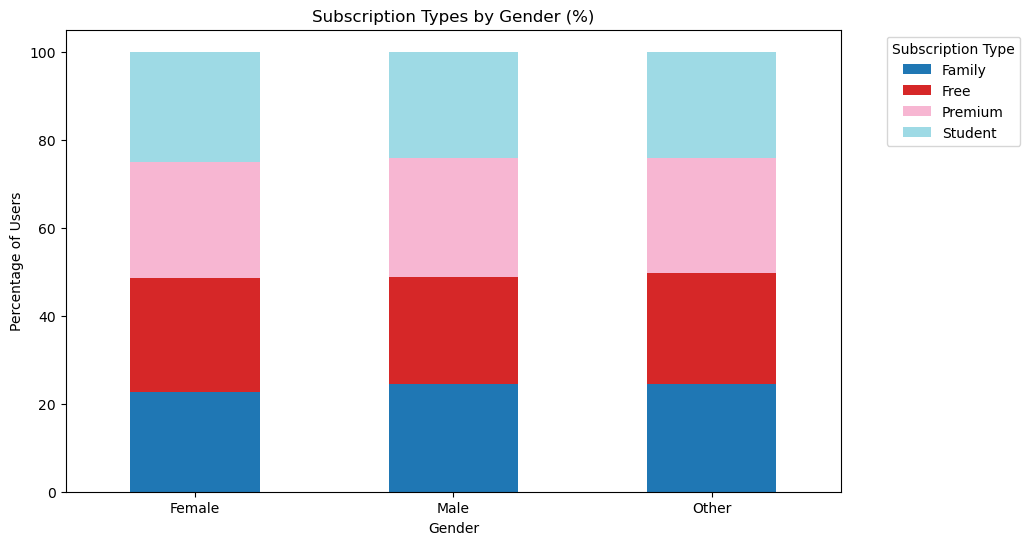

In [349]:
# PERCENTAGE
gender_sub_counts = df.groupby(["gender", "subscription_type"])["user_id"].count().unstack().fillna(0)
gender_sub_percent = gender_sub_counts.div(gender_sub_counts.sum(axis=1), axis=0) * 100

print("Percentage distribution of subscription types by gender:\n")
print(gender_sub_percent.round(2))
gender_sub_percent.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Subscription Types by Gender (%)")
plt.ylabel("Percentage of Users")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Subscription Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


Subscription type distribution by age:

subscription_type  Family  Free  Premium  Student
age                                              
16                     40    52       44       36
17                     33    47       42       55
18                     38    49       49       49
19                     39    45       58       39
20                     50    50       60       42
21                     42    49       56       52
22                     43    59       51       47
23                     41    32       50       52
24                     45    46       41       44
25                     39    53       39       37
26                     44    48       43       38
27                     32    36       40       38
28                     40    47       45       41
29                     37    39       42       33
30                     48    50       53       41
31                     36    41       52       44
32                     49    42       44       49
33        

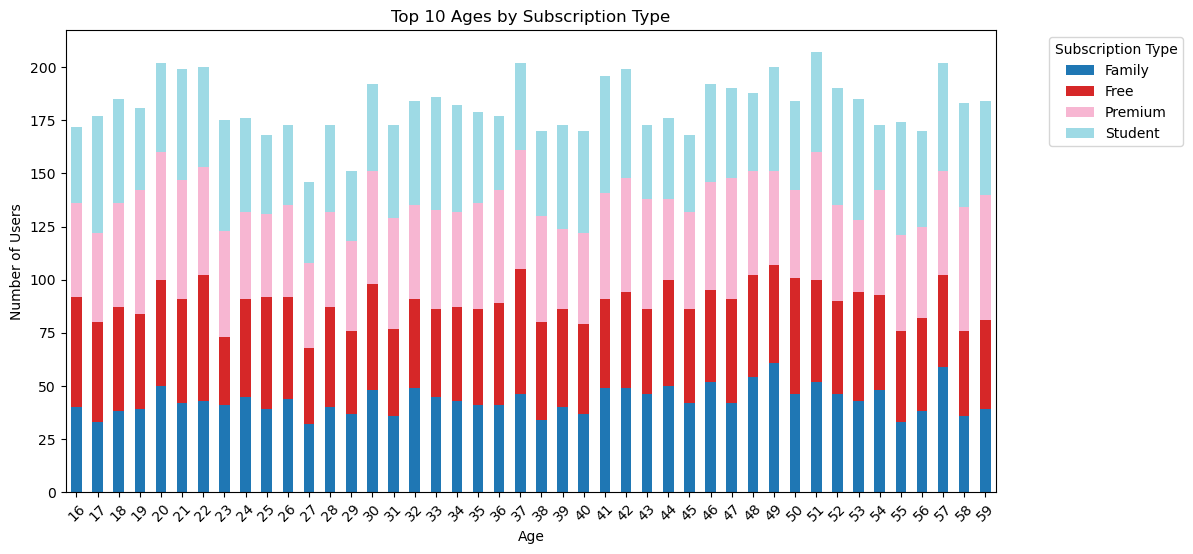

In [357]:
# SUBSCRIPTION TYPE BY AGE
age_sub_counts = df.groupby(["age", "subscription_type"])["user_id"].count().unstack().fillna(0)

print("Subscription type distribution by age:\n")
print(age_sub_counts)
max_sub_per_age = age_sub_counts.idxmax(axis=1)
print("\nMost common subscription type per age:\n")
print(max_sub_per_age)
age_sub_counts.head(8000).plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Top 10 Ages by Subscription Type")
plt.ylabel("Number of Users")
plt.xlabel("Age")
plt.xticks(rotation=45)
plt.legend(title="Subscription Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23364\2098286851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sub_counts = df.groupby(["age_group", "subscription_type"])["user_id"].count().unstack().fillna(0)


Subscription type distribution by age group:

subscription_type  Family  Free  Premium  Student
age_group                                        
<18                    73    99       86       91
18-24                 298   330      365      325
25-34                 413   441      450      424
35-44                 433   463      484      435
45-54                 486   473      476      442
55-64                 205   212      254      242
65+                     0     0        0        0


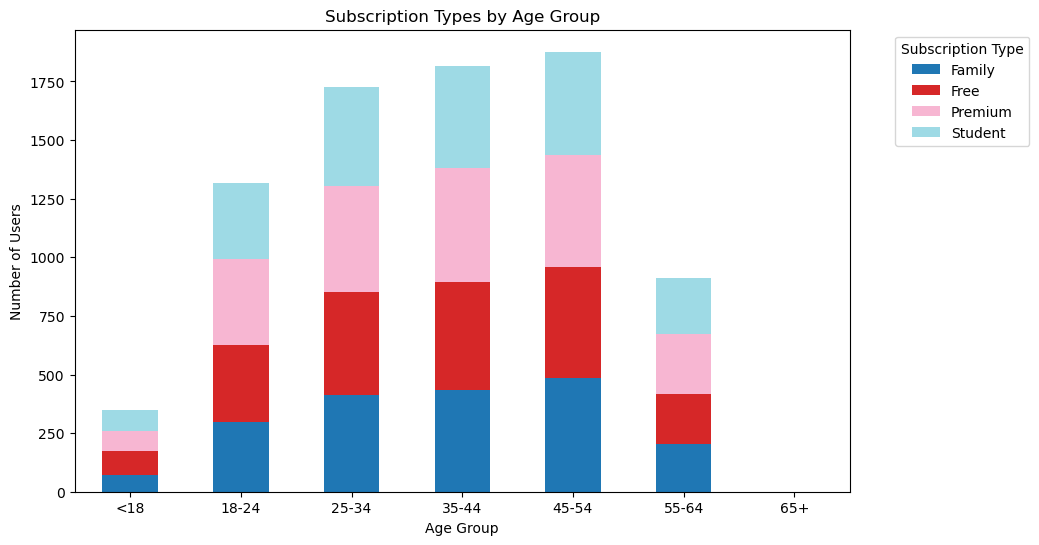

In [361]:
# Visualization - stacked bar chart
age_group_sub_counts = df.groupby(["age_group", "subscription_type"])["user_id"].count().unstack().fillna(0)
print("Subscription type distribution by age group:\n")
print(age_group_sub_counts)
age_group_sub_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Subscription Types by Age Group")
plt.ylabel("Number of Users")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(title="Subscription Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

Age with the highest average skip rate: 29 (avg skip rate = 0.32)


C:\Users\HP\AppData\Local\Temp\ipykernel_23364\164176843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skip_rate_by_age.head(10).index,


<Axes: xlabel='age'>

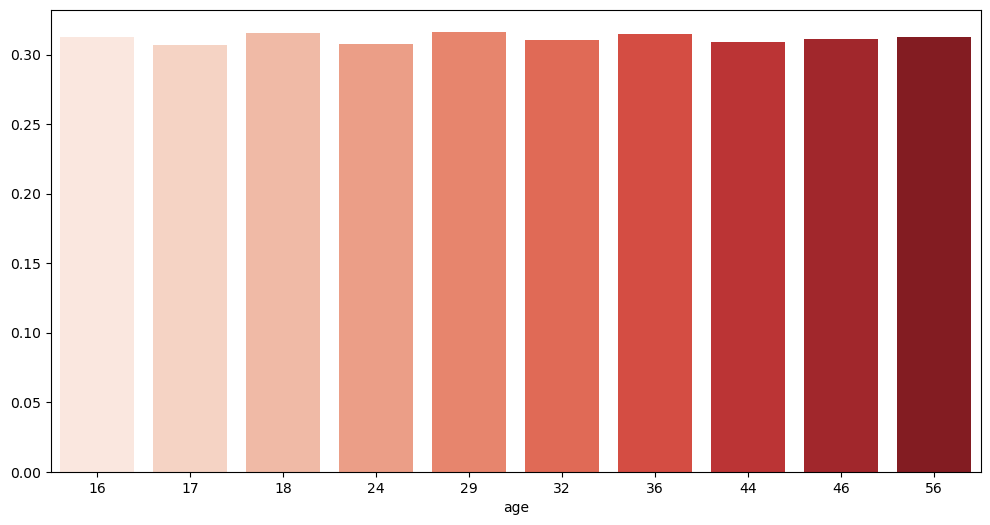

In [385]:
# AGE WITH MOST SKIP RATE
top_age = skip_rate_by_age.idxmax()
top_rate = skip_rate_by_age.max()
print(f"Age with the highest average skip rate: {top_age} (avg skip rate = {top_rate:.2f})")
plt.figure(figsize=(12,6))
sns.barplot(x=skip_rate_by_age.head(10).index, 
            y=skip_rate_by_age.head(10).values, 
            palette="Reds")

Age with the highest average ads listened per week: 37 (8.48 ads/week)


C:\Users\HP\AppData\Local\Temp\ipykernel_23364\1520811620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ads_by_age.head(10).index, y=ads_by_age.head(10).values, palette="Blues")


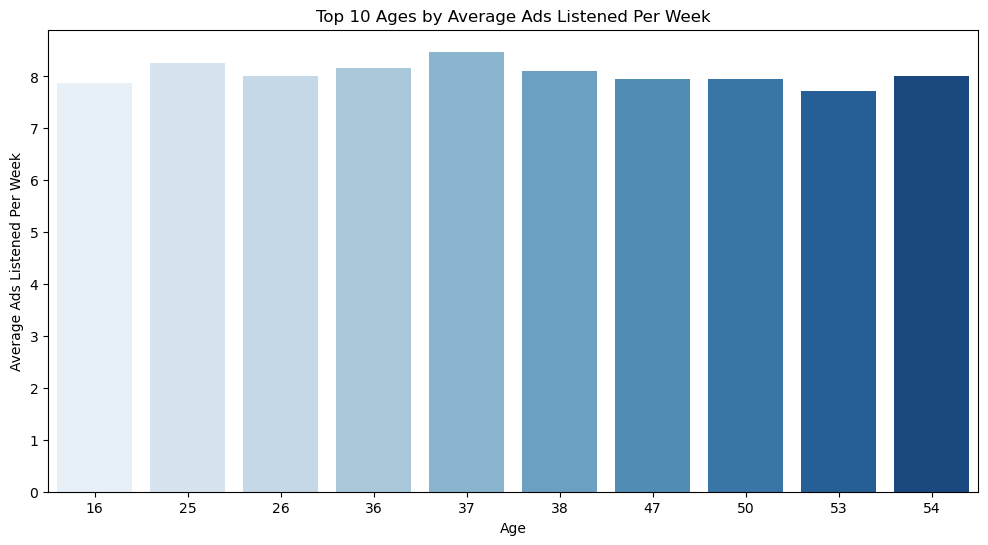

In [415]:
# TOP MOST AD LISTENERS BY AGE
top_age = ads_by_age.idxmax()
top_ads = ads_by_age.max()
print(f"Age with the highest average ads listened per week: {top_age} ({top_ads:.2f} ads/week)")
plt.figure(figsize=(12,6))
sns.barplot(x=ads_by_age.head(10).index, y=ads_by_age.head(10).values, palette="Blues")
plt.title("Top 10 Ages by Average Ads Listened Per Week")
plt.ylabel("Average Ads Listened Per Week")
plt.xlabel("Age")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23364\4139743080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ads_by_age_group.index, y=ads_by_age_group.values, palette="Blues")


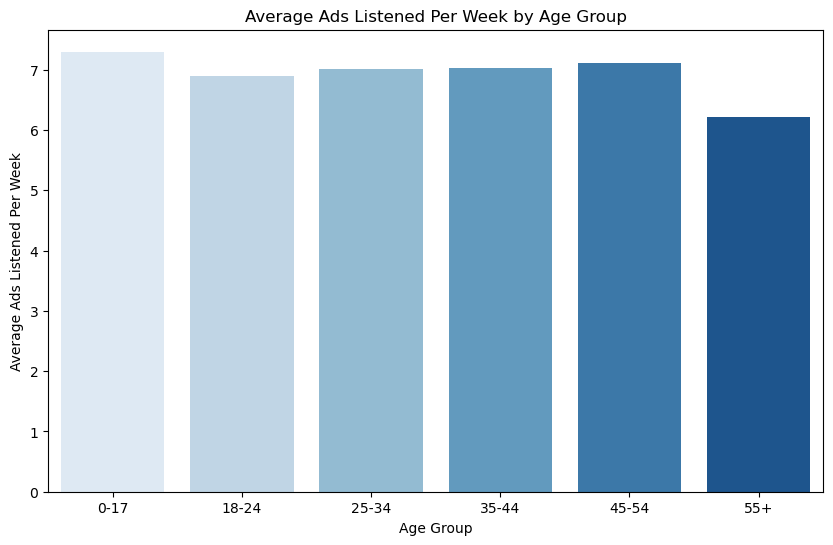

In [441]:
# RATE BY AGE GROUP
plt.figure(figsize=(10,6))
sns.barplot(x=ads_by_age_group.index, y=ads_by_age_group.values, palette="Blues")
plt.title("Average Ads Listened Per Week by Age Group")
plt.ylabel("Average Ads Listened Per Week")
plt.xlabel("Age Group")
plt.show()

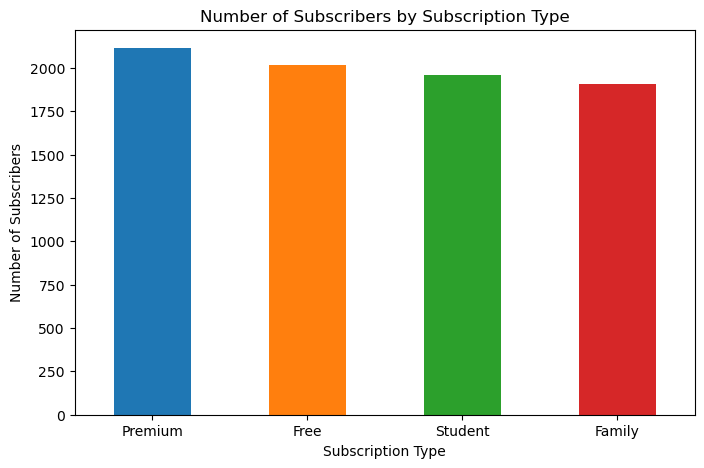

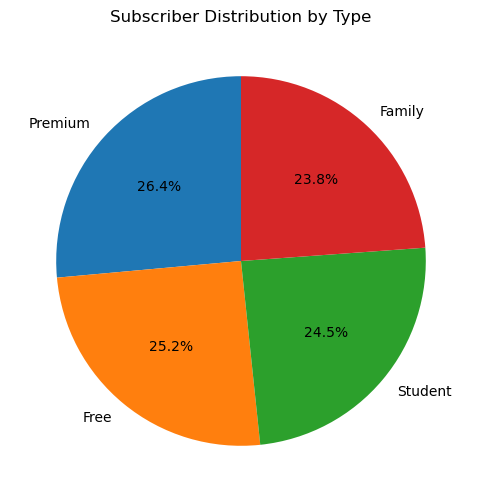

In [453]:
# Number of subscribers per subscription type
sub_counts = df["subscription_type"].value_counts()
plt.figure(figsize=(8,5))
sub_counts.plot(kind="bar", color=["#1f77b4","#ff7f0e","#2ca02c","#d62728"])
plt.title("Number of Subscribers by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Number of Subscribers")
plt.xticks(rotation=0)
plt.show()



plt.figure(figsize=(6,6))
sub_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, colors=["#1f77b4","#ff7f0e","#2ca02c","#d62728"])
plt.title("Subscriber Distribution by Type")
plt.ylabel("")  # remove y-label for cleaner pie chart
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23364\1184295538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_songs_by_sub.index, y=avg_songs_by_sub.values, palette="viridis", ax=axes[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_23364\1184295538.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_songs_by_sub.index, y=total_songs_by_sub.values, palette="mako", ax=axes[1])


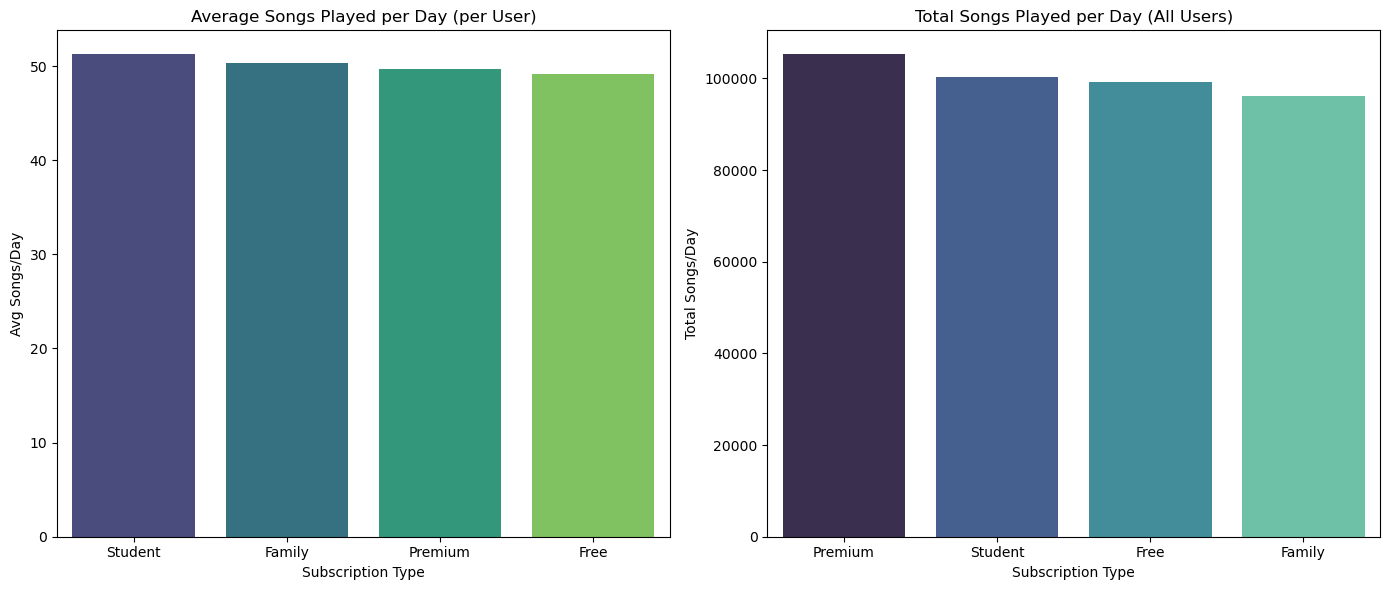

In [483]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.barplot(x=avg_songs_by_sub.index, y=avg_songs_by_sub.values, palette="viridis", ax=axes[0])
axes[0].set_title("Average Songs Played per Day (per User)")
axes[0].set_xlabel("Subscription Type")
axes[0].set_ylabel("Avg Songs/Day")

sns.barplot(x=total_songs_by_sub.index, y=total_songs_by_sub.values, palette="mako", ax=axes[1])
axes[1].set_title("Total Songs Played per Day (All Users)")
axes[1].set_xlabel("Subscription Type")
axes[1].set_ylabel("Total Songs/Day")
plt.tight_layout()
plt.show()

Total Churned Users by Subscription Type:

subscription_type
Premium    530
Family     525
Student    513
Free       503
Name: is_churned, dtype: int64

Churn Rate by Subscription Type (%):

subscription_type
Family     27.52
Student    26.19
Premium    25.06
Free       24.93
Name: is_churned, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_23364\3892643526.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churned_by_sub.index, y=churned_by_sub.values, palette="Reds", ax=axes[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_23364\3892643526.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_sub.index, y=churn_rate_by_sub.values, palette="Oranges", ax=axes[1])


Text(0, 0.5, 'Churn Rate (%)')

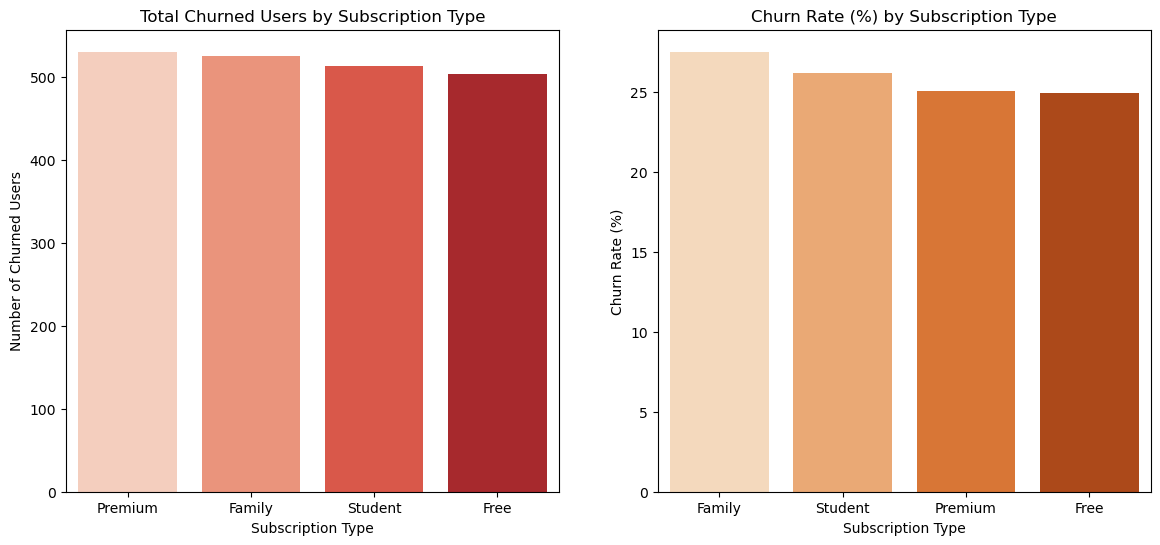

In [502]:
# MOST SUBSCRIBERS TYPE BY IS CHURNED
churned_by_sub = df.groupby("subscription_type")["is_churned"].sum().sort_values(ascending=False)
churn_rate_by_sub = df.groupby("subscription_type")["is_churned"].mean().sort_values(ascending=False) * 100
print("Total Churned Users by Subscription Type:\n")
print(churned_by_sub)
print("\nChurn Rate by Subscription Type (%):\n")
print(churn_rate_by_sub.round(2))

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x=churned_by_sub.index, y=churned_by_sub.values, palette="Reds", ax=axes[0])
axes[0].set_title("Total Churned Users by Subscription Type")
axes[0].set_xlabel("Subscription Type")
axes[0].set_ylabel("Number of Churned Users")

sns.barplot(x=churn_rate_by_sub.index, y=churn_rate_by_sub.values, palette="Oranges", ax=axes[1])
axes[1].set_title("Churn Rate (%) by Subscription Type")
axes[1].set_xlabel("Subscription Type")
axes[1].set_ylabel("Churn Rate (%)")